In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("NFLcombine.csv")

df = (
    df
    .dropna()
    .reset_index(drop=True)
    .drop(columns=['Pfr_ID', 'Year', 'AV', 'Team', 'Round', 'Pick', 'Player', 'Pos', 'BenchReps'])
)

In [4]:
df.columns, df.dtypes

(Index(['Ht', 'Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle'], dtype='object'),
 Ht             int64
 Wt             int64
 Forty        float64
 Vertical     float64
 BroadJump    float64
 Cone         float64
 Shuttle      float64
 dtype: object)

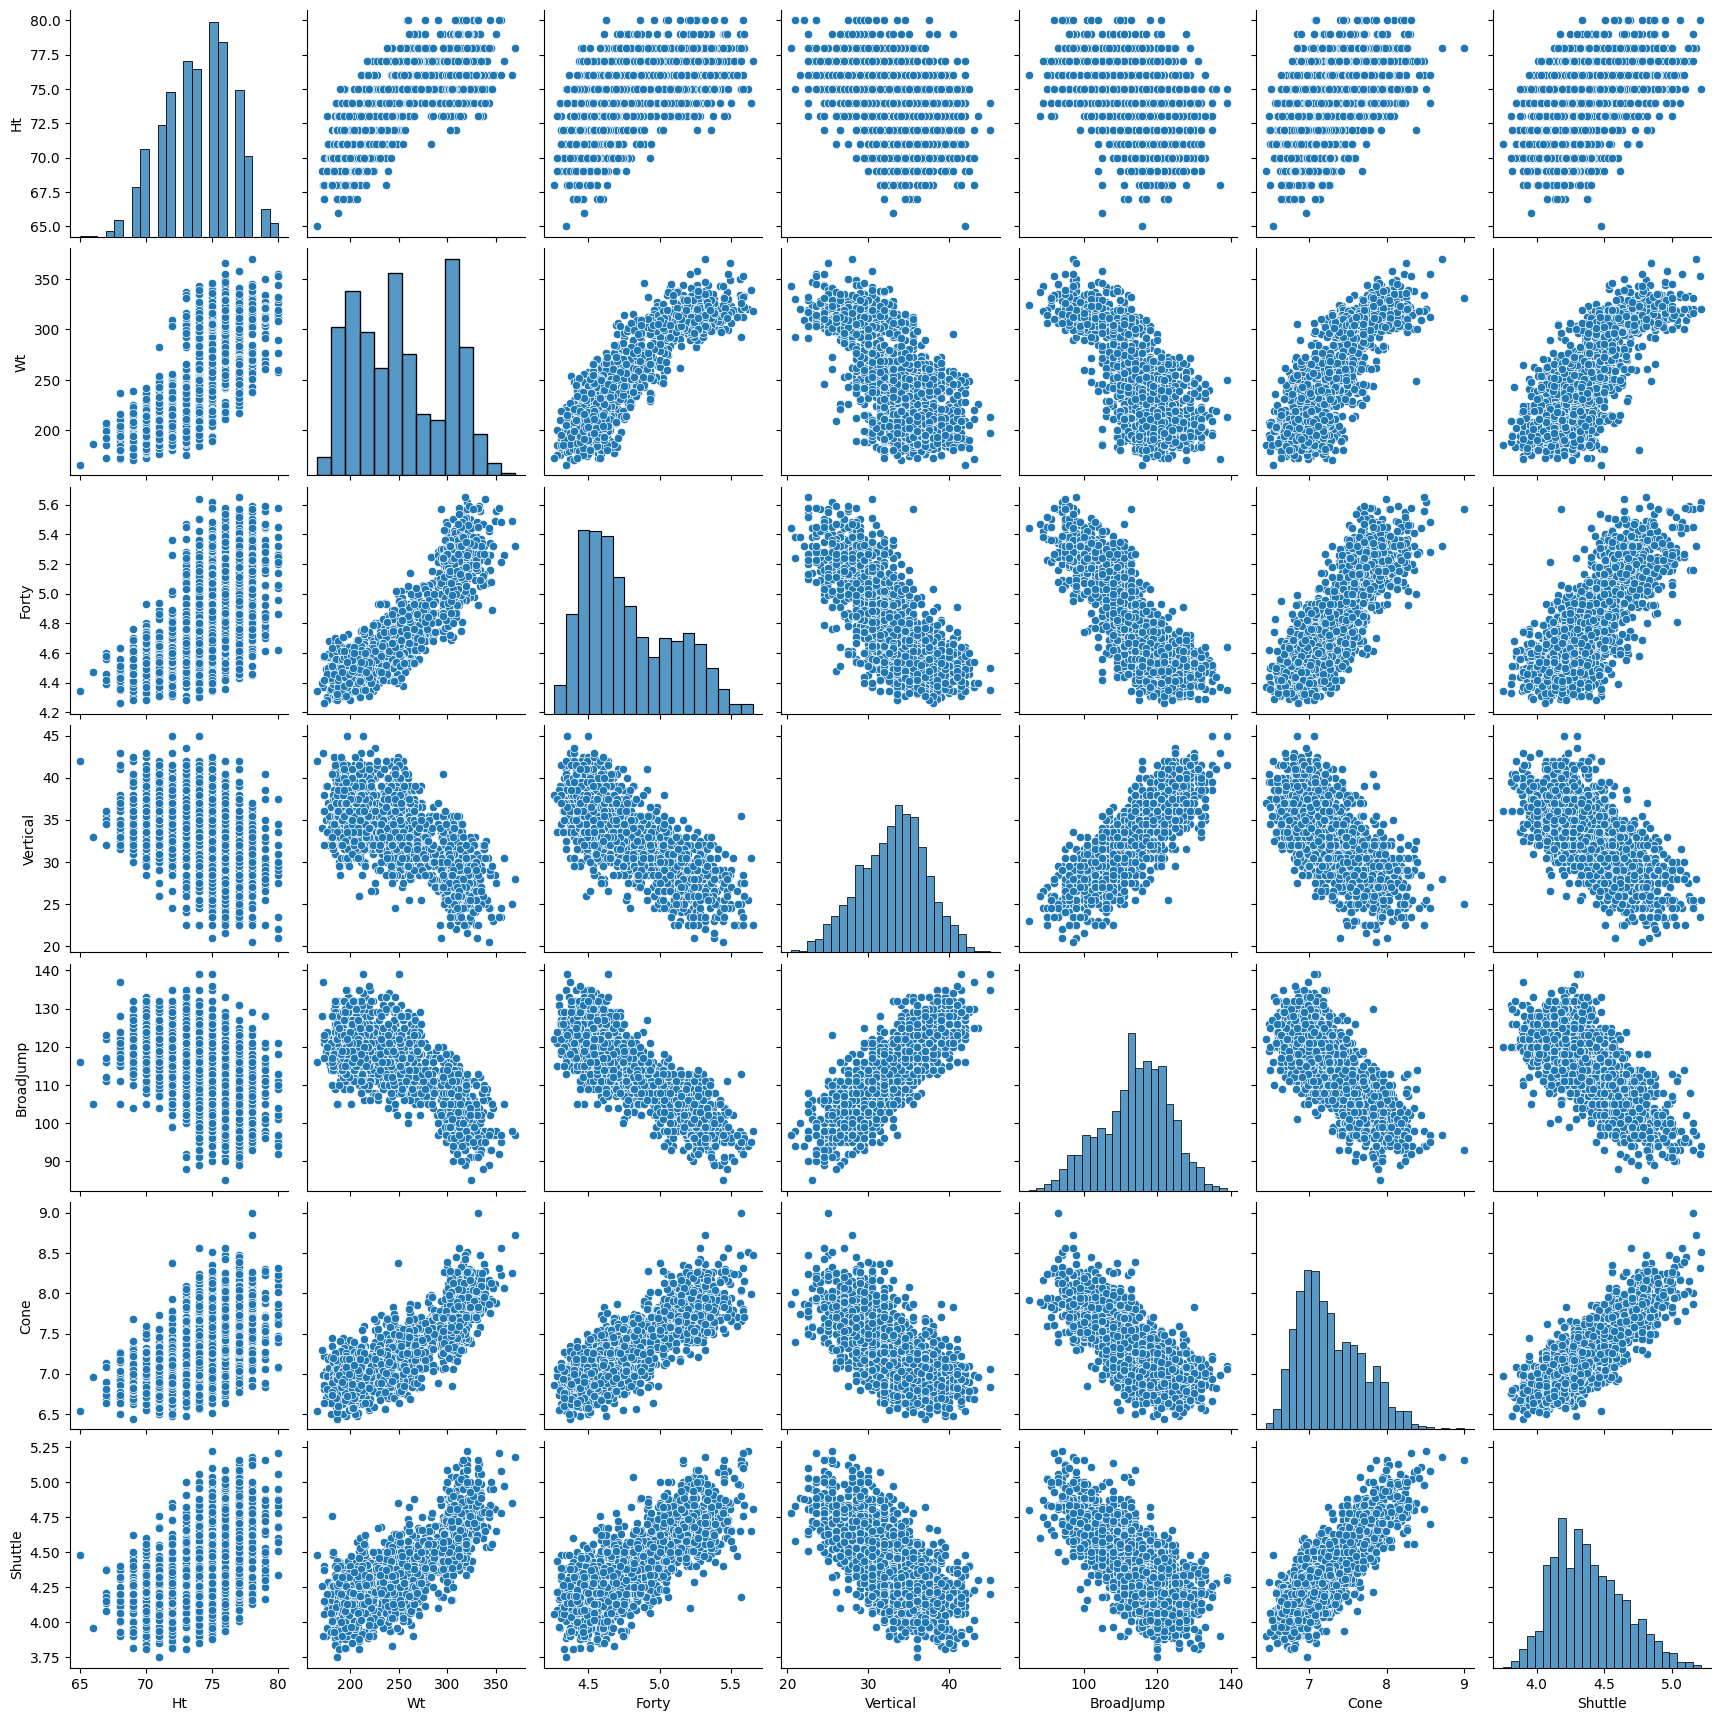

In [5]:
sns.pairplot(data=df)
pass

In [6]:
X = df[['Ht', 'Wt', 'Vertical', 'BroadJump', 'Cone', 'Shuttle']]
y = df['Forty']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = lm.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.013431844085818451
R2: 0.8643614785356448


In [19]:
lm.score(X_train, y_train), lm.score(X_test, y_test)

(0.8658547675534501, 0.8643614785356448)

In [12]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lm, X, y, cv=5)
print(f'Mean csv: {cvs.mean()}')

Mean csv: 0.8580335664317505


In [13]:
# Checking assumptions of linearity

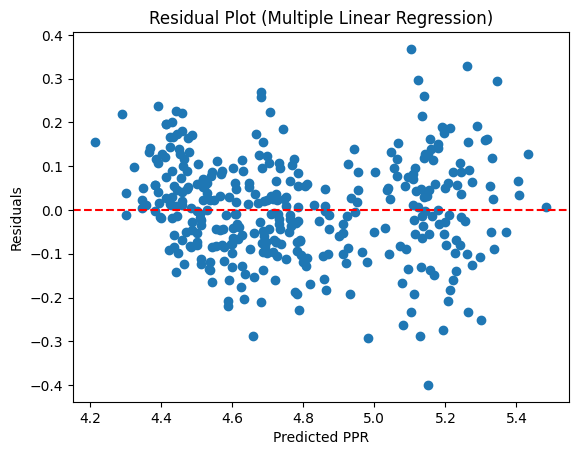

In [14]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted PPR")
plt.ylabel("Residuals")
plt.title("Residual Plot (Multiple Linear Regression)")
plt.show()

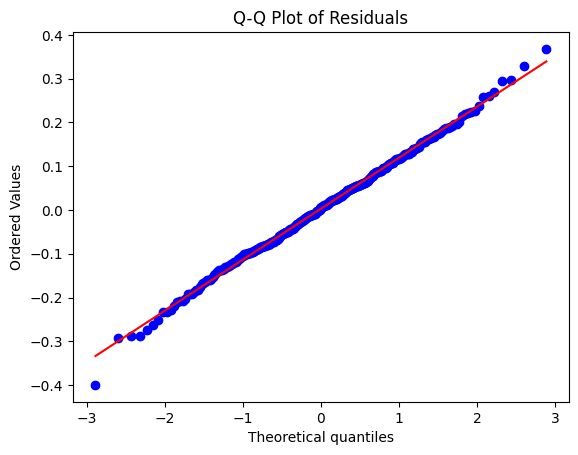

In [15]:
import scipy.stats as stats
stats.probplot(residuals, plot=plt, dist=stats.norm)
plt.title("Q-Q Plot of Residuals")
plt.show()